# 881 Project - Models
_____


### In this file

**Loading Data and Imputation**

- Loading the Data 
- Imputation

**Models Used:**
- LinReg
- LogReg
- KNN (with cosine sim.)
- Random Forest
- XGBoost
- GNN
______

In [1]:
# !pip install xgboost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Data

In [2]:
csv_file = pd.read_csv('881_full_data_2024-11-14_181745.csv')
print(csv_file.columns)
data_to_predict = csv_file[csv_file['Poverty Rate'].isna()]
data_to_use = csv_file[csv_file['Poverty Rate'].notna()]

# Define feature set
selected_features = [
    # Transportation behavior
    'Total Commuters',
    'Driving Alone',
    'Public Transportation',
    'Walking',
    'Cycling',
    'Worked from Home',
    
    # Infrastructure scores
    'walkscore',
    'bikescore',
    'transitscore',
    
    # Density/structural features
    'Housing Density',
    'Housing Availability',
    'Average Household Size',
    
    # Basic demographics
    'Median Age',
    'Total Population',
    'Black or African American'
]

# Create X datasets
X = data_to_use[selected_features].copy()
X_validation = data_to_predict[selected_features].copy()

# Create percentage Black feature
X['Percent_Black'] = X['Black or African American'] / X['Total Population']
X_validation['Percent_Black'] = X_validation['Black or African American'] / X_validation['Total Population']

# Drop the raw count columns now that we have the percentage
X = X.drop(['Black or African American', 'Total Population'], axis=1)
X_validation = X_validation.drop(['Black or African American', 'Total Population'], axis=1)

# Define y
y = data_to_use['Poverty Rate']
y_validation = data_to_predict['Poverty Rate']

display(X.head())

Index(['NAME', 'Total Commuters', 'Driving Alone', 'Carpooling',
       'Public Transportation', 'Walking', 'Cycling', 'Other Means',
       'Worked from Home', 'White', 'Black or African American',
       'American Indian and Alaska Native', 'Asian',
       'Native Hawaiian and Other Pacific Islander', 'Some Other Race',
       'Two or More Races', 'Total Population', 'Median Income',
       'Poverty Count', 'Median Age', 'Total Housing Units', 'Housing Units',
       'Occupied Housing Units', 'Median Housing Value',
       'Average Household Size', 'Median Gross Rent', 'state', 'county',
       'tract', 'Poverty Rate', 'Labor Force 16-19', 'Labor Force 20-24',
       'Labor Force 25-29', 'Labor Force 30-34', 'Labor Force 35-39',
       'Labor Force 40-44', 'Labor Force 45-49', 'Labor Force 50-54',
       'Labor Force Total', 'Housing Density', 'Housing Availability',
       'Total Population.1', 'state_fips', 'county_fips', 'tract_code',
       'GEOID', 'lat', 'lon', 'walkscore', 'bi

,Total Commuters,Driving Alone,Public Transportation,Walking,Cycling,Worked from Home,walkscore,bikescore,transitscore,Housing Density,Housing Availability,Average Household Size,Median Age,Percent_Black
0,405.0,342.0,0.0,0.0,0.0,0.0,0.0,22.0,NaN,1318.734793,61.392989,1.96,64.4,0.006083
1,832.0,723.0,0.0,0.0,0.0,0.0,0.0,30.0,NaN,745.915033,40.416210,2.19,56.9,0.002859
2,1005.0,926.0,0.0,0.0,0.0,0.0,0.0,24.0,NaN,699.603318,33.350515,2.11,55.4,0.006131
3,624.0,537.0,0.0,0.0,0.0,0.0,0.0,20.0,NaN,1544.981799,67.822282,2.01,58.7,0.000000
4,475.0,423.0,0.0,0.0,0.0,0.0,0.0,25.0,NaN,1080.000000,57.407407,2.16,56.1,0.017037


#### We will compare several methods including removing all missing values, imputing missing values based on other features, and replacing all missing values with a score of 0/1

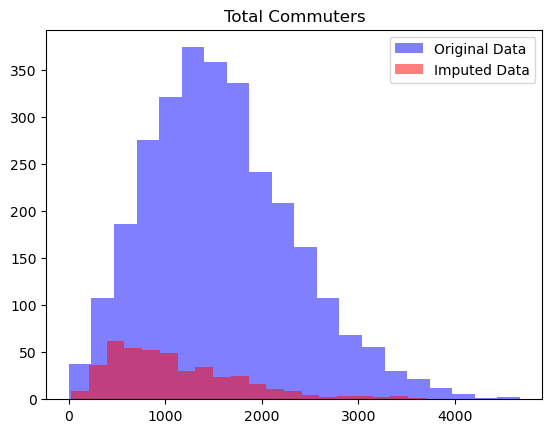

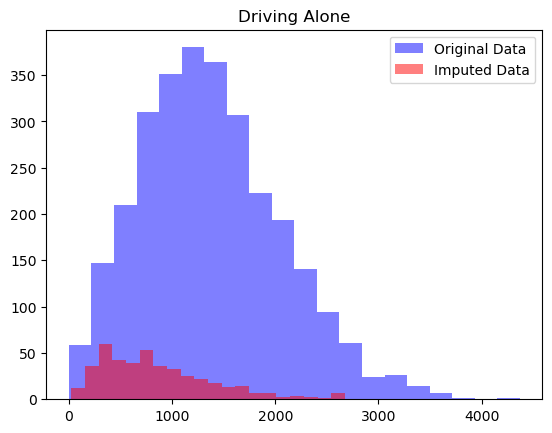

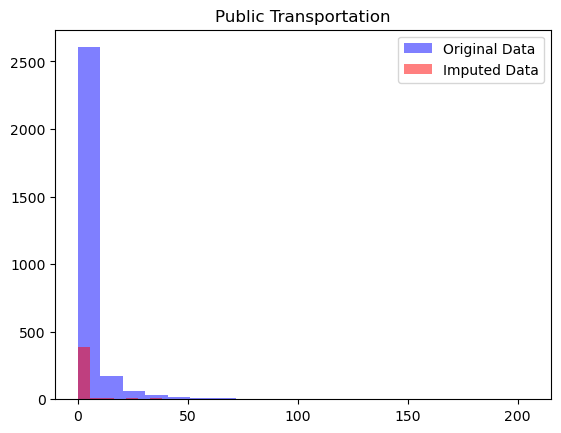

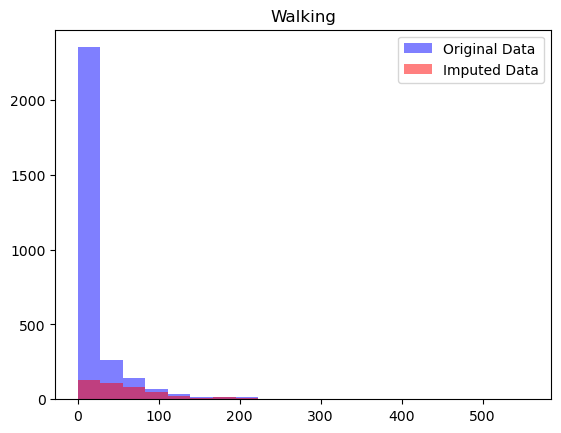

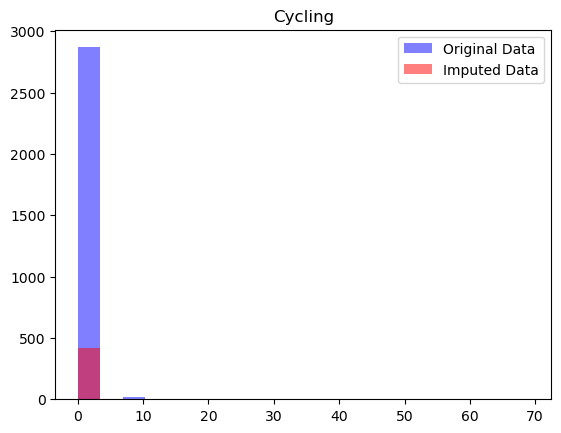

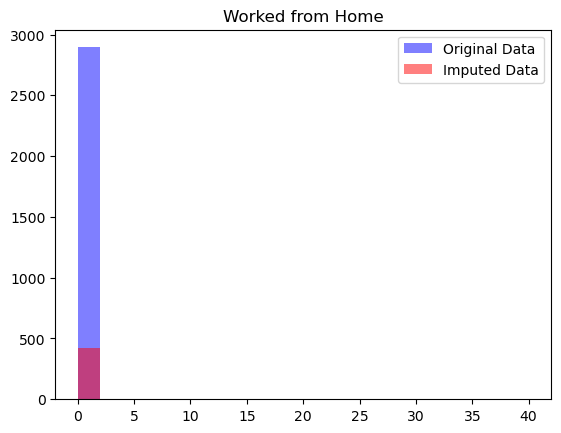

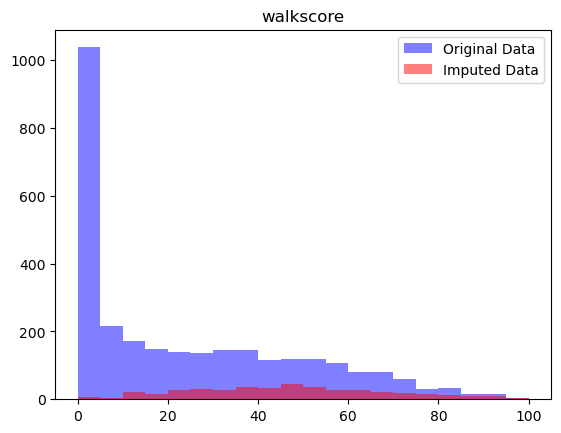

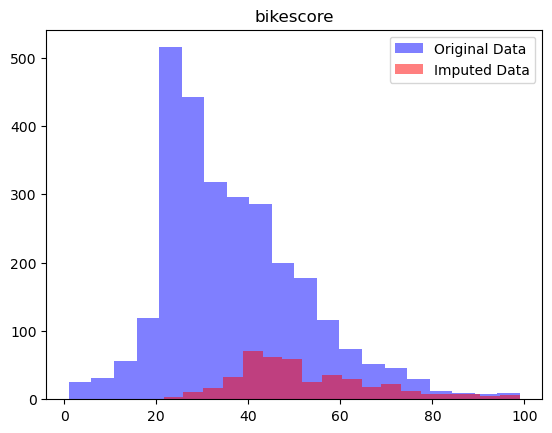

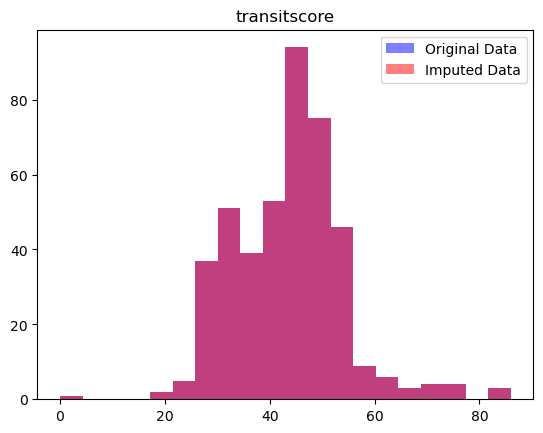

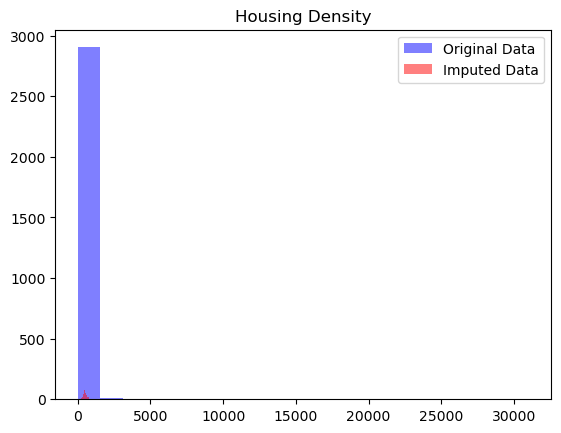

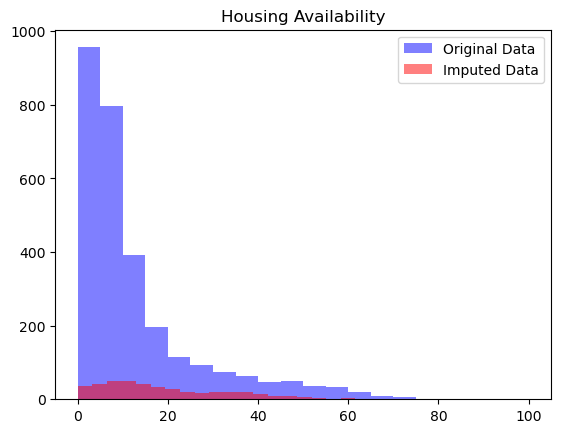

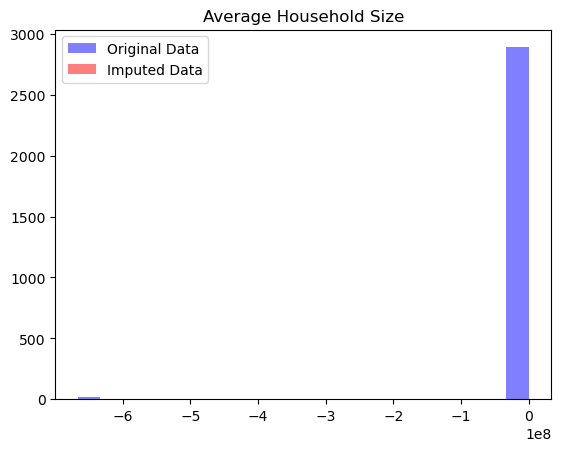

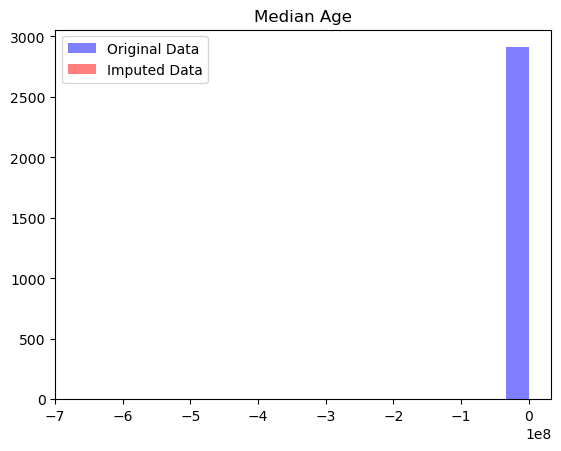

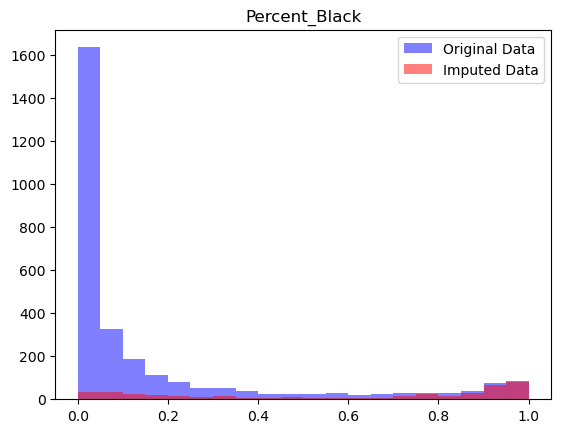

In [3]:
X_removemissing = X.copy()

X_removemissing.dropna(inplace=True)

X_removemissing[X_removemissing.isna().any(axis=1)]

for column_name in X.columns:
    plt.hist(X[column_name], color = 'b', alpha=.5, bins = 20, label='Original Data')
    plt.hist(X_removemissing[column_name], color = 'r', alpha=.5, bins = 20, label='Imputed Data')
    plt.title(column_name)
    plt.legend()
    plt.show()

Removes a ton of data, bad option :(

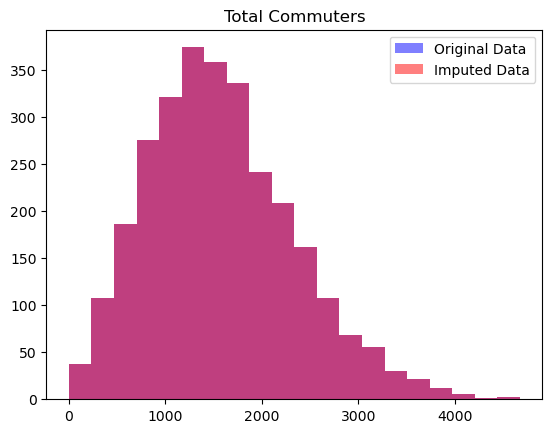

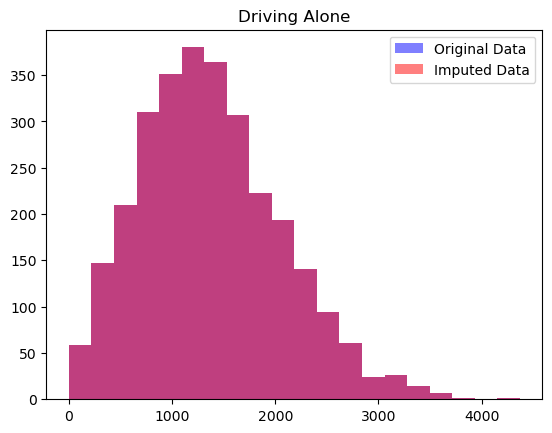

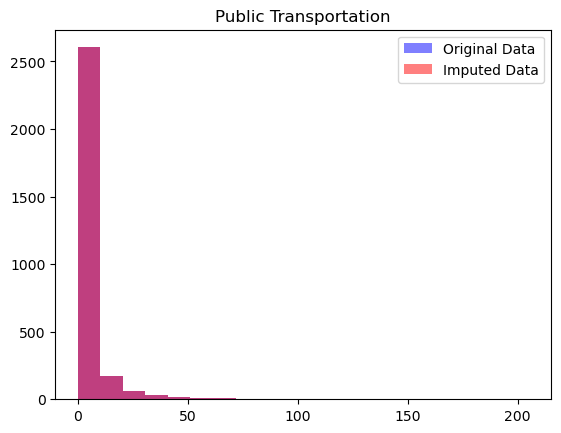

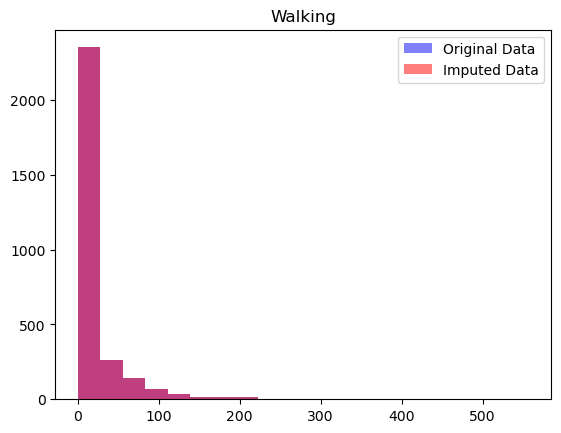

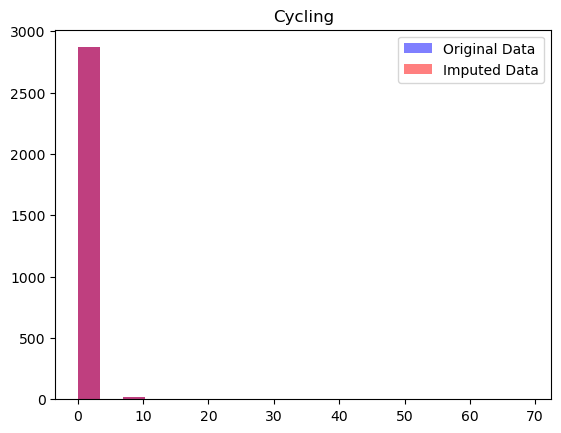

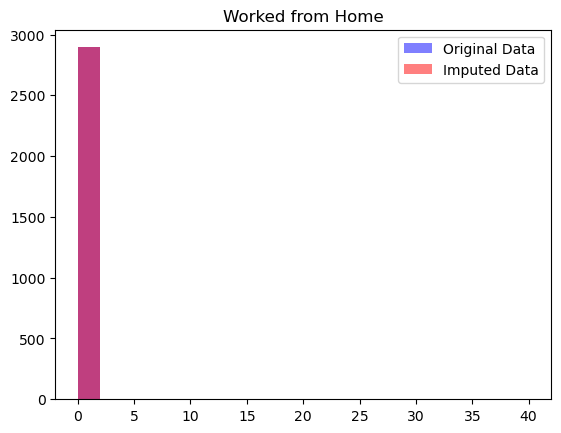

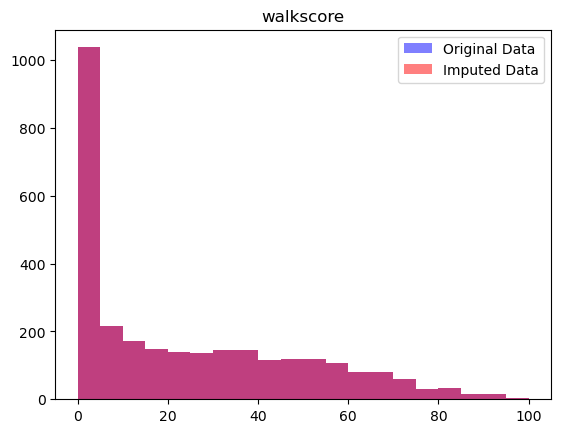

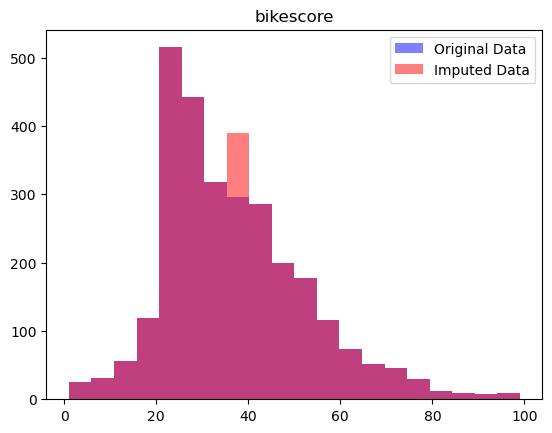

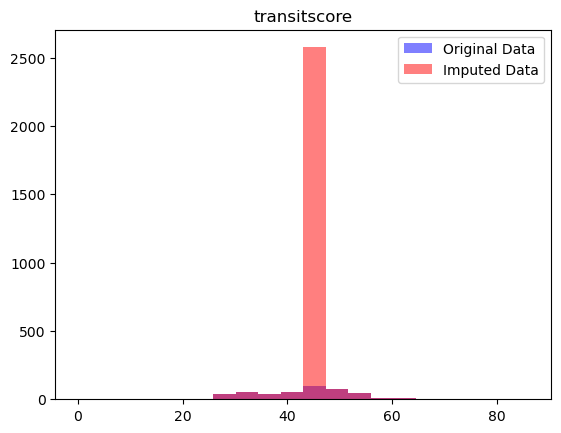

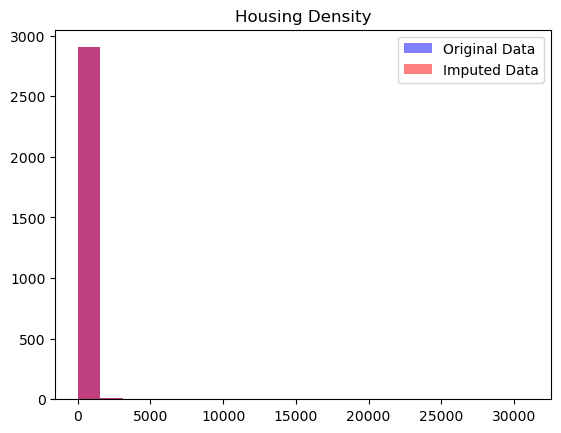

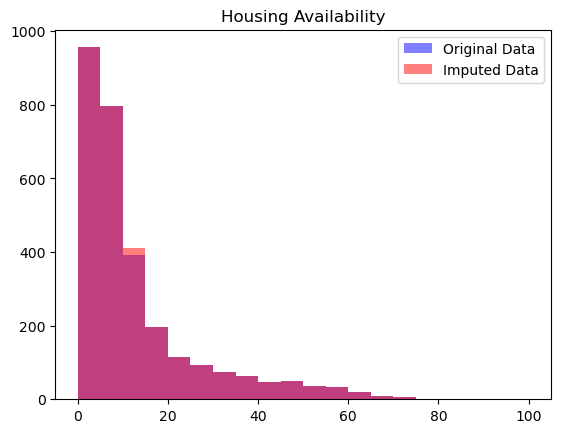

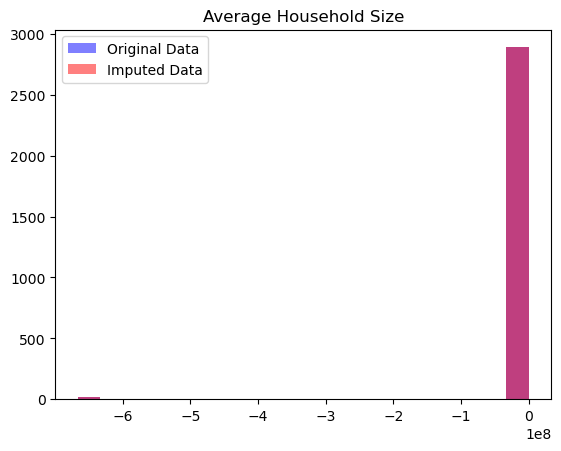

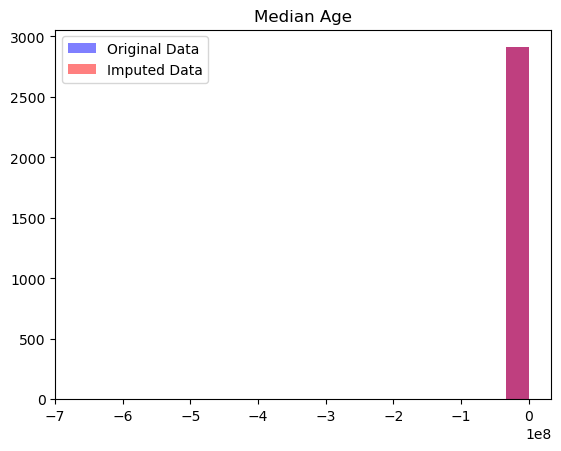

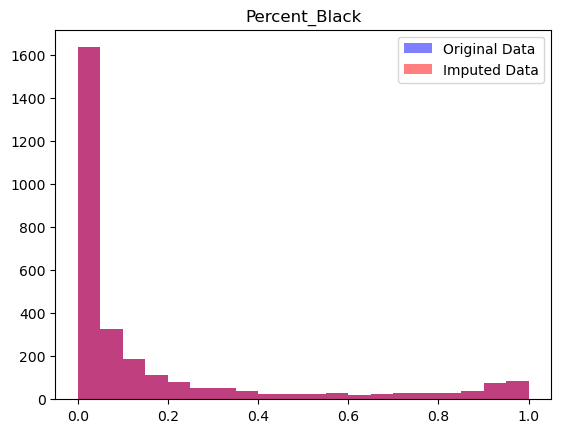

In [4]:
my_imp = SimpleImputer(missing_values=np.NaN)#, strategy = 'most_frequent')
X_imputed = pd.DataFrame(my_imp.fit_transform(X), columns= X.columns)

X_imputed[X_imputed.isna().any(axis=1)]

for column_name in X.columns:
    plt.hist(X[column_name], color = 'b', alpha=.5, bins = 20, label='Original Data')
    plt.hist(X_imputed[column_name], color = 'r', alpha=.5, bins = 20, label='Imputed Data')
    plt.title(column_name)
    plt.legend()
    plt.show()

The data which wasn't missing values retained it's distribution, the data that was now has a spike in the imputed value location. Transit score and median gross rent are the most affected

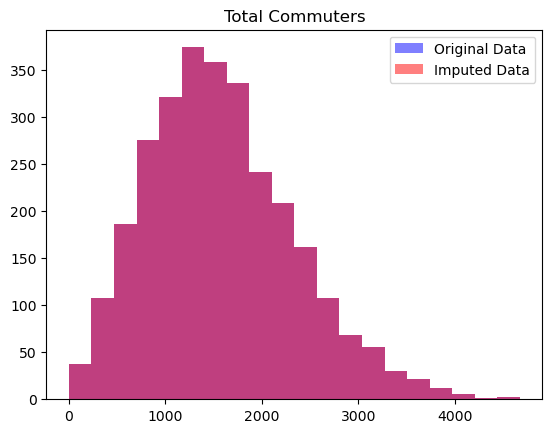

Total orig. counts: 2913
Total imputed counts: 2913


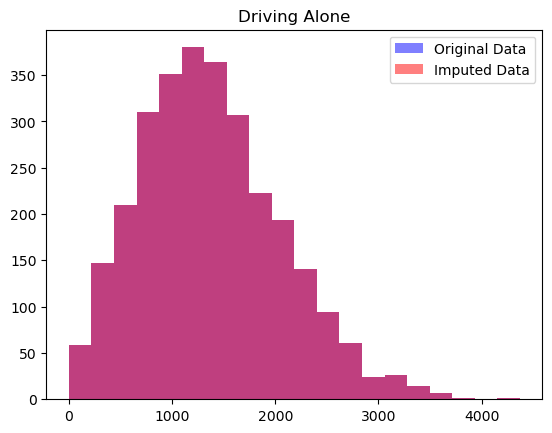

Total orig. counts: 2913
Total imputed counts: 2913


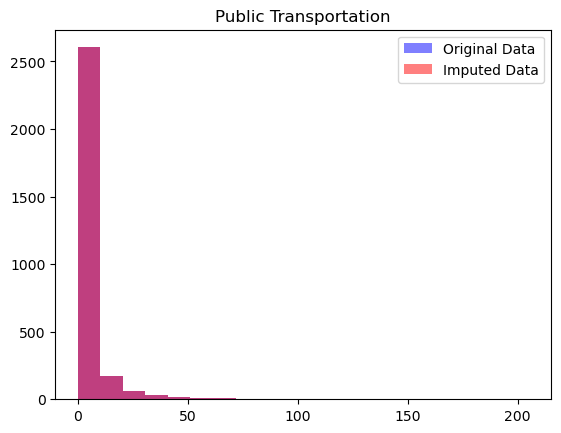

Total orig. counts: 2913
Total imputed counts: 2913


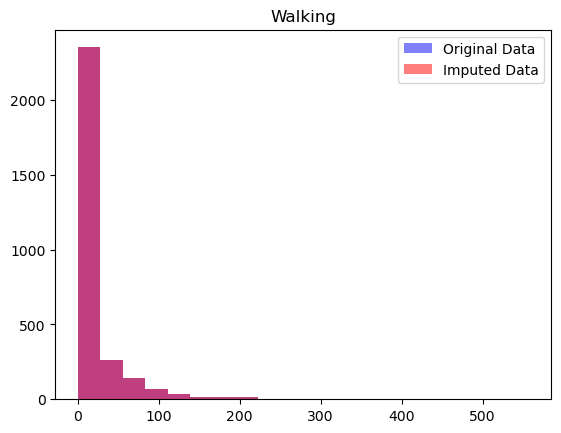

Total orig. counts: 2913
Total imputed counts: 2913


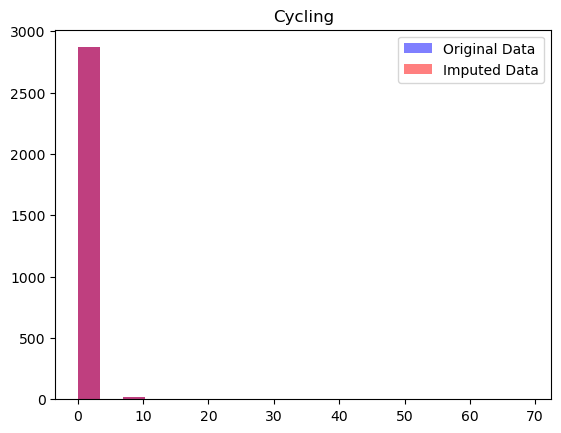

Total orig. counts: 2913
Total imputed counts: 2913


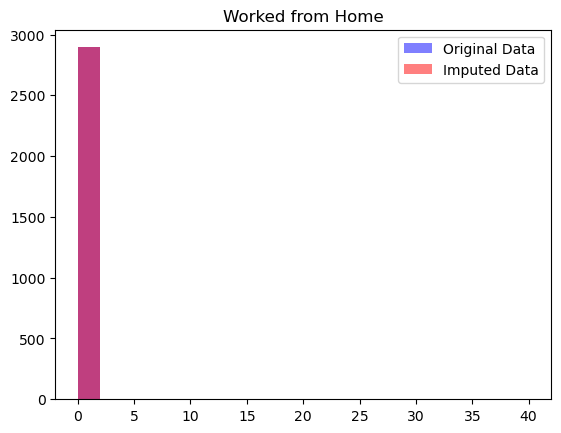

Total orig. counts: 2913
Total imputed counts: 2913


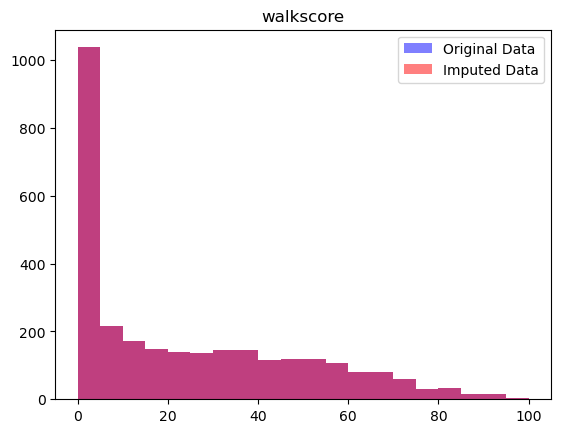

Total orig. counts: 2913
Total imputed counts: 2913


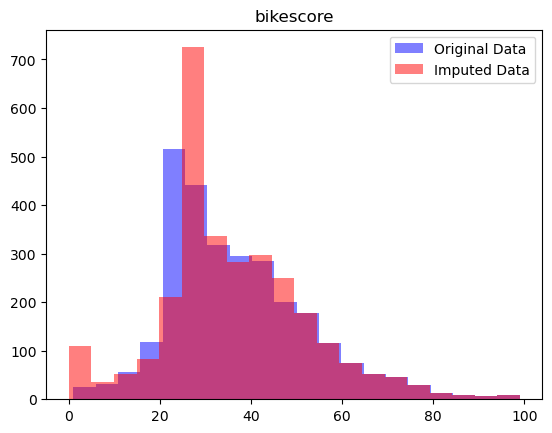

Total orig. counts: 2819
Total imputed counts: 2913


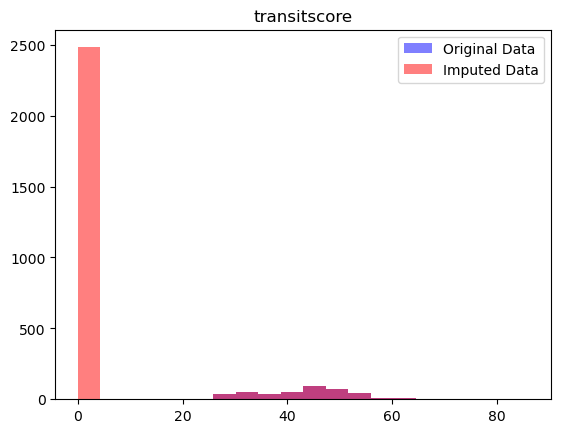

Total orig. counts: 432
Total imputed counts: 2913


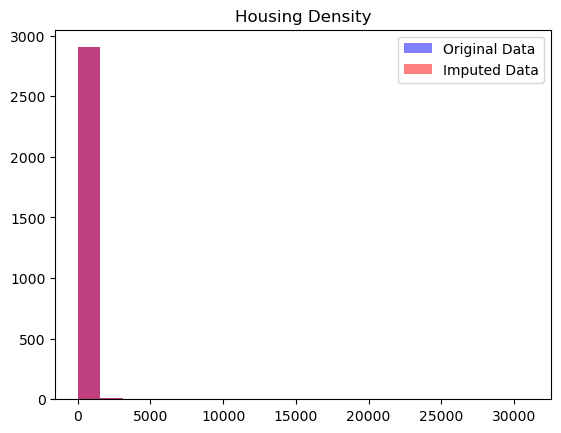

Total orig. counts: 2913
Total imputed counts: 2913


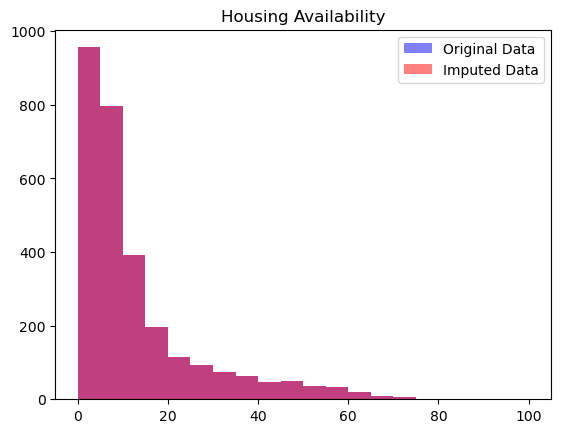

Total orig. counts: 2895
Total imputed counts: 2895


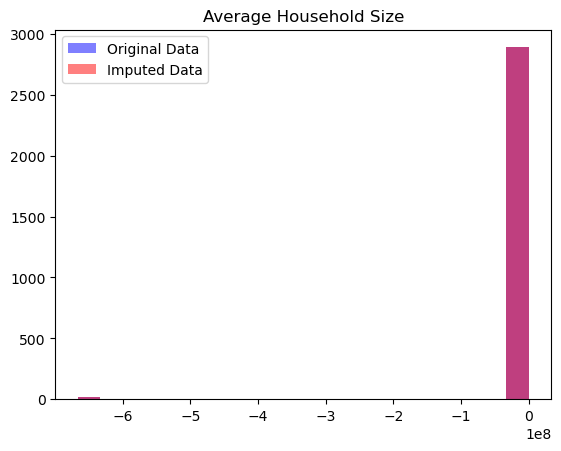

Total orig. counts: 2913
Total imputed counts: 2913


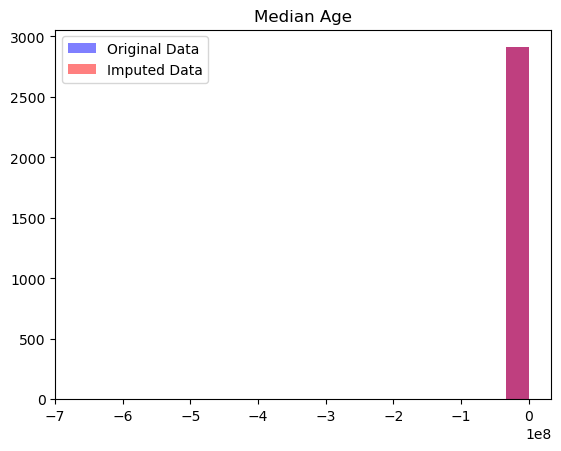

Total orig. counts: 2913
Total imputed counts: 2913


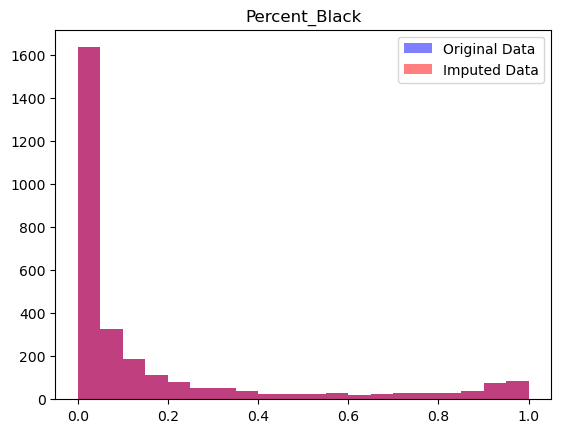

Total orig. counts: 2913
Total imputed counts: 2913


In [5]:
X_replaced = X.copy()

X_replaced['walkscore'] = X_replaced['walkscore'].fillna(0)
X_replaced['bikescore'] = X_replaced['bikescore'].fillna(0)
X_replaced['transitscore'] = X_replaced['transitscore'].fillna(0)
# X_replaced['Median Gross Rent'] = X_replaced['Median Gross Rent'].fillna(0)

X_replaced[X_replaced.isna().any(axis=1)]

for column_name in X.columns:
    plt.hist(X[column_name], color = 'b', alpha=.5, bins = 20, label='Original Data')
    plt.hist(X_replaced[column_name], color = 'r', alpha=.5, bins = 20, label='Imputed Data')
    plt.title(column_name)
    plt.legend()
    plt.show()
    print(f"Total orig. counts: {X[column_name].count()}")
    print(f"Total imputed counts: {X_replaced[column_name].count()}")

The data which wasn't missing values retained it's distribution, the data that was now has a spike in the 0s.

Recommendation: Use the mean imputation method

#### Test/Train Split

Used 20% of poverty rate from online sourcing stating that a county's poverty overall is a concern if it remains over 20%.

In [6]:
#Splitting test/train data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.25, random_state=0)


,Total Commuters,Driving Alone,Public Transportation,Walking,Cycling,Worked from Home,walkscore,bikescore,transitscore,Housing Density,Housing Availability,Average Household Size,Median Age,Percent_Black
232,2544.0,2271.0,7.0,5.0,0.0,0.0,0.0,22.0,43.421296,468.096234,11.210428,2.29,46.4,0.142782
610,2039.0,1506.0,0.0,300.0,0.0,0.0,55.0,86.0,43.421296,648.254299,11.655949,1.75,27.8,0.058364
1368,1852.0,1750.0,0.0,3.0,0.0,0.0,0.0,25.0,43.421296,410.096991,10.612492,2.68,40.5,0.001741
1454,2899.0,2507.0,0.0,45.0,0.0,0.0,0.0,33.0,43.421296,463.809982,0.553633,2.09,45.2,0.055529
1032,1511.0,1376.0,0.0,0.0,0.0,0.0,25.0,60.0,43.421296,482.167542,10.894495,2.11,44.5,0.028753


## 1. Linear Regression

Intercept: 8.598627706959217
Slope: [-8.22464148e-03  6.37655998e-03  4.42063582e-02  5.61373355e-02
 -2.29686428e-02  7.51266502e-03  4.99751252e-02  1.29860782e-01
 -5.00500879e-02  1.31539112e-03  1.40836900e-01  1.71348977e-08
 -1.21310457e-07  1.56969242e+01]
Mean Squared Error: 84.26851371373294
R^2 Score: 0.4407323196471158


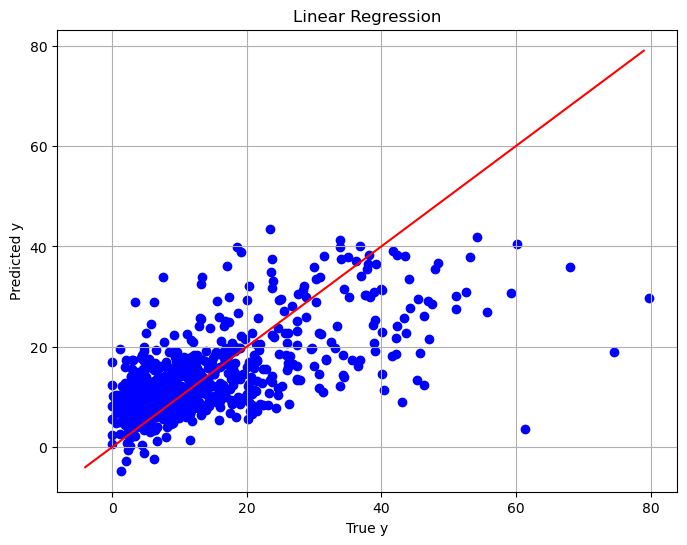

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_linreg = lin_reg.predict(X_test)

print("Intercept:", lin_reg.intercept_)
print("Slope:", lin_reg.coef_)

mse = mean_squared_error(y_test, y_pred_linreg)
r2 = r2_score(y_test, y_pred_linreg)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linreg, color='blue')

plot_line = np.linspace(int(np.min([np.min(y_test), np.min(y_pred_linreg)])),
                       int(np.max([np.max(y_test), np.max(y_pred_linreg)])))
plt.plot(plot_line, plot_line, color = 'red')
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.title("Linear Regression")
plt.grid(True)
plt.show()

In [8]:
feature_importance = lin_reg.coef_
for name, imp in zip(X_train.columns, feature_importance):
    print(f"Feature {name}: Coefficient {imp}")

Feature Total Commuters: Coefficient -0.008224641478621649
Feature Driving Alone: Coefficient 0.006376559976995778
Feature Public Transportation: Coefficient 0.04420635816652921
Feature Walking: Coefficient 0.05613733545715209
Feature Cycling: Coefficient -0.022968642761672937
Feature Worked from Home: Coefficient 0.007512665018110473
Feature walkscore: Coefficient 0.049975125224320016
Feature bikescore: Coefficient 0.12986078235665682
Feature transitscore: Coefficient -0.05005008785957242
Feature Housing Density: Coefficient 0.0013153911236053826
Feature Housing Availability: Coefficient 0.14083690002486193
Feature Average Household Size: Coefficient 1.7134897655629238e-08
Feature Median Age: Coefficient -1.213104573645553e-07
Feature Percent_Black: Coefficient 15.696924213770217


No hyperparameter training, more important is feature selection & interpretting model results.

Feature importance shows that Median Gross Rent, Labor Force 45-49, & bikescore are the most predictive features for poverty rates. This is what we would expect to find from the data according to our initial thoughts about rent and bike-ability being predictive of poverty levels, although we had not considered the Labor Force 45-49 variable before.

## 2. Logistic Regression

In [9]:
#Checking hyperparameters
log_reg = LogisticRegression(max_iter=1000, solver='saga')

param_grid = {
    'penalty': ['l1', 'l2', 'none'],
    'C': [0.01, 0.1, .5, 1, 3, 5, 8, 10],
    'solver': ['lbfgs', 'saga']
}

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_class)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
log_reg = LogisticRegression(**best_params)
log_reg.fit(X_train, y_train_class)

y_pred_logreg = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test_class, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test_class, y_pred_logreg))

In [ ]:
importances =  log_reg.coef_[0]
for name, imp in zip(X_train.columns, importances):
    print(f"Feature {name}: Coefficient {imp}")

C default is 1, lower C value is more regularization. l2 penalty (ridge) is default, l1 penalty is lasso. Different solvers allow different penalties. 

Most default values were chosen as best hyperparameters. C=5 is not the default and results in less regularization.

Feature importance shows that Black or African American, Labor Force Total, Total Population, Labor Force 30-34, & Labor Force 25-29 were most predictive of poverty rates. The Black or African American feature was more predictive than other variables.

## 3. KNN

In [81]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [2, 3, 5, 7, 10, 12, 15, 18, 20], #default=5
    'weights': ['uniform', 'distance'], #default=uniform
    'metric': ['euclidean', 'manhattan', 'cosine'], #default=euclidean
    'algorithm': ['brute', 'ball_tree', 'kd_tree'] #default=auto (selects between the three on its own)
}


grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_class)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

Best Parameters: {'algorithm': 'brute', 'metric': 'cosine', 'n_neighbors': 10, 'weights': 'distance'}


C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mxgre\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 228, in fit
    return

In [82]:
knn = KNeighborsClassifier(**best_params)

knn.fit(X_train, y_train_class)

y_pred_knn = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test_class, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_knn))
print("Classification Report:\n", classification_report(y_test_class, y_pred_knn))

Accuracy: 0.8545953360768176
Confusion Matrix:
 [[541  29]
 [ 77  82]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.95      0.91       570
         1.0       0.74      0.52      0.61       159

    accuracy                           0.85       729
   macro avg       0.81      0.73      0.76       729
weighted avg       0.85      0.85      0.84       729



Cosine similarity doesn't work for ball_tree/kd_tree, but does for brute force method (used in my work as one of the standard distance measures, so worth adding even if it's not the most efficient).

Most defaults were not used, cosine similarity and distance weights are not the default but provided the best accuracies. 15 neighbors is also more than we usually use (of 5), so it's possible this indicates a larger number of areas where the tracts with the same values have different outcomes (since we need so many neighbors to predict our bets accuracy).

## 4. Random Forest

In [83]:
rf = RandomForestClassifier(random_state=0)

param_dist = {
    'max_depth': [5, 10, 20, None], #default=None
    'min_samples_split': [2, 10, 20], #default=2
    'max_features': ['sqrt', 'log2', None] #default=sqrt
}

random_search = GridSearchCV(rf, param_dist, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train_class)

best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

KeyboardInterrupt: 

In [ ]:
rf = RandomForestClassifier(random_state=0, **best_params)
rf.fit(X_train, y_train_class)

y_pred_randfor = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test_class, y_pred_randfor))
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_randfor))
print("Classification Report:\n", classification_report(y_test_class, y_pred_randfor))

In [ ]:
importances = rf.feature_importances_
for name, imp in zip(X_train.columns, importances):
    print(f"Feature {name}: Importance {imp}")

2/3 of the parameters used the defaults, the one which didn't was max_depth, which implies that cutting off the tree depth should prevent overfitting for this data.

Feature importance shows that Black or African American & Labor Force 30-34 were most predictive of poverty rates. 

## 5. XGBoost

In [ ]:
# xgb = XGBClassifier()

# param_grid = {
#     'n_estimators': [50, 100, 200, 300], #default=100
#     'learning_rate': [0.01, 0.1, .3, .5], #default=.3
#     'max_depth': [3, 5, 6, 7], #default=6
#     'gamma': [0, 1, 5] #default=0
# }

# grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train, y_train_class)

# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

In [ ]:
xgb = XGBClassifier()
# xgb = XGBClassifier(**best_params)
xgb.fit(X_train, y_train_class)

y_pred_xgboost = xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test_class, y_pred_xgboost))
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred_xgboost))
print("Classification Report:\n", classification_report(y_test_class, y_pred_xgboost))

In [ ]:
importances = xgb.feature_importances_
for name, imp in zip(X_train.columns, importances):
    print(f"Feature {name}: Importance {imp}")

Jupyter was crashing when trying to use model parameter training, won't be doing that unfortunately :( .

Feature importance shows that Black or African American, Median Gross Rent, Labor Force 30-34, & Labor Force Total are most predictive of poverty rates.

# 6. Results


The linear regression model did the best with an ~89% accuracy, the other models were all within 1-2 % of each other withing 82-84%.

In [ ]:
print('Linear Regression: ', mean_squared_error(y_test, y_pred_linreg)/100,
      '\nLogistic Regression: ', accuracy_score(y_test_class, y_pred_logreg),
      '\nKNN: ', accuracy_score(y_test_class, y_pred_knn),
      '\nRandom Forest: ', accuracy_score(y_test_class, y_pred_randfor),
      '\nXGBoost: ', accuracy_score(y_test_class, y_pred_xgboost)
     )

____ 
# 7. Additonal Model: GNN

##### Below is GNN 1: It is not intended to be used in the analysis. 

In [10]:

########### Chunk 1: GNN ## old chunk, still run for objects 

# import torch
# from torch_geometric.data import Data
# from torch_geometric.nn import SAGEConv
# from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import radius_neighbors_graph
# import numpy as np

# # First create the binary classes
# y_class = y.copy()
# y_class[y >= 20] = 1
# y_class[y < 20] = 0

# # Then do the splits
# X_train_full, X_test, y_train_full, y_test = train_test_split(X_imputed, y_class, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# # Now normalize and convert to tensors
# scaler = StandardScaler()
# X_train_normalized = torch.FloatTensor(scaler.fit_transform(X_train))
# X_val_normalized = torch.FloatTensor(scaler.transform(X_val))
# X_test_normalized = torch.FloatTensor(scaler.transform(X_test))

# # Convert targets to tensors
# y_train_tensor = torch.FloatTensor(y_train.values).reshape(-1, 1)
# y_val_tensor = torch.FloatTensor(y_val.values).reshape(-1, 1)
# y_test_tensor = torch.FloatTensor(y_test.values).reshape(-1, 1)

# # Create coordinates for each split
# coords_train = np.column_stack([
#     csv_file.loc[X_train.index, 'lat'],
#     csv_file.loc[X_train.index, 'lon']
# ])
# coords_val = np.column_stack([
#     csv_file.loc[X_val.index, 'lat'],
#     csv_file.loc[X_val.index, 'lon']
# ])
# coords_test = np.column_stack([
#     csv_file.loc[X_test.index, 'lat'],
#     csv_file.loc[X_test.index, 'lon']
# ])

# # Training graph
# train_adj_matrix = radius_neighbors_graph(
#     coords_train,
#     radius=0.15,  # radius choice of 0.15 is close to 20 km
#     mode='distance',
#     metric='haversine',
#     include_self=False
# )
# train_edge_index = torch.tensor(train_adj_matrix.nonzero(), dtype=torch.long)
# train_edge_weight = torch.tensor(train_adj_matrix.data, dtype=torch.float)

# # Validation graph
# val_adj_matrix = radius_neighbors_graph(
#     coords_val,
#     radius=0.15,  # radius choice of 0.15 is close to 20 km
#     mode='distance',
#     metric='haversine',
#     include_self=False
# )
# val_edge_index = torch.tensor(val_adj_matrix.nonzero(), dtype=torch.long)
# val_edge_weight = torch.tensor(val_adj_matrix.data, dtype=torch.float)

# # Test graph
# test_adj_matrix = radius_neighbors_graph(
#     coords_test,
#     radius=0.15,  # radius choice of 0.15 is close to 20 km
#     mode='distance',
#     metric='haversine',
#     include_self=False
# )
# test_edge_index = torch.tensor(test_adj_matrix.nonzero(), dtype=torch.long)
# test_edge_weight = torch.tensor(test_adj_matrix.data, dtype=torch.float)

# # Create Data objects
# train_data = Data(x=X_train_normalized, y=y_train_tensor, edge_index=train_edge_index, edge_attr=train_edge_weight)
# val_data = Data(x=X_val_normalized, y=y_val_tensor, edge_index=val_edge_index, edge_attr=val_edge_weight)
# test_data = Data(x=X_test_normalized, y=y_test_tensor, edge_index=test_edge_index, edge_attr=test_edge_weight)

# # Enhanced GNN Model with GraphSAGE
# class EnhancedGNN(torch.nn.Module):
#    def __init__(self, input_dim, hidden_dim=64, output_dim=1):
#        super(EnhancedGNN, self).__init__()
#        self.conv1 = SAGEConv(input_dim, hidden_dim)
#        self.conv2 = SAGEConv(hidden_dim, hidden_dim)
#        self.fc = torch.nn.Linear(hidden_dim, output_dim)
#        self.dropout = torch.nn.Dropout(0.2)

#    def forward(self, x, edge_index):
#        x = self.conv1(x, edge_index)
#        x = torch.relu(x)
#        x = self.dropout(x)
#        x = self.conv2(x, edge_index)
#        x = torch.relu(x)
#        x = self.fc(x)
#        return torch.sigmoid(x)

# # Initialize model, optimizer, and loss function
# model = EnhancedGNN(input_dim=X_train_normalized.shape[1])
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# criterion = torch.nn.BCELoss()

# # Training Loop with Early Stopping
# def train_gnn_with_early_stopping(model, train_data, val_data, optimizer, criterion, patience=10, epochs=300):
#    model.train()
#    best_loss = float('inf')
#    patience_counter = 0
#    best_model_state = None

#    for epoch in range(epochs):
#        # Training
#        optimizer.zero_grad()
#        out = model(train_data.x, train_data.edge_index)
#        loss = criterion(out, train_data.y)
#        loss.backward()
#        optimizer.step()

#        # Validation
#        model.eval()
#        with torch.no_grad():
#            val_out = model(val_data.x, val_data.edge_index)
#            val_loss = criterion(val_out, val_data.y)

#        print(f'Epoch {epoch + 1}, Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

#        # Early stopping
#        if val_loss < best_loss:
#            best_loss = val_loss
#            patience_counter = 0
#            best_model_state = model.state_dict()
#        else:
#            patience_counter += 1
#            if patience_counter >= patience:
#                print(f"Early stopping at epoch {epoch + 1}")
#                model.load_state_dict(best_model_state)
#                break

# # Evaluation Function
# def evaluate_gnn(model, data):
#    model.eval()
#    with torch.no_grad():
#        out = model(data.x, data.edge_index)
#        pred = (out > 0.5).float()
#        accuracy = (pred == data.y).float().mean()
#    return accuracy.item()

# # Train and Evaluate
# train_gnn_with_early_stopping(model, train_data, val_data, optimizer, criterion)

# # Calculate accuracies
# train_accuracy = evaluate_gnn(model, train_data)
# val_accuracy = evaluate_gnn(model, val_data)
# test_accuracy = evaluate_gnn(model, test_data)

# print(f'Training Accuracy: {train_accuracy:.4f}')
# print(f'Validation Accuracy: {val_accuracy:.4f}')
# print(f'Test Accuracy: {test_accuracy:.4f}')


# ############### Chunk 2: Plotting (Modified)
# import torch_geometric.utils as utils
# import matplotlib.pyplot as plt
# import networkx as nx
# import numpy as np

# # Create coordinates arrays from csv_file using X_train indices
# coords_train = np.column_stack([
#     csv_file.loc[X_train.index, 'lat'],
#     csv_file.loc[X_train.index, 'lon']
# ])

# def create_sample_data(data, coords, sample_size):
#     """
#     Creates a smaller sample of the GNN data for testing
#     """
#     # Sample indices
#     n_nodes = data.x.size(0)
#     sampled_indices = np.random.choice(n_nodes, size=sample_size, replace=False)
    
#     # Create mask for edges that connect sampled nodes
#     edge_mask = np.isin(data.edge_index[0], sampled_indices) & np.isin(data.edge_index[1], sampled_indices)
    
#     # Create new data object with sampled nodes
#     sampled_data = Data(
#         x=data.x[sampled_indices],
#         y=data.y[sampled_indices],
#         edge_index=data.edge_index[:, edge_mask]
#     )
    
#     # Remap edge indices
#     idx_map = {old_idx: new_idx for new_idx, old_idx in enumerate(sampled_indices)}
#     sampled_data.edge_index = torch.tensor([[idx_map[idx.item()] for idx in sampled_data.edge_index[0]],
#                                           [idx_map[idx.item()] for idx in sampled_data.edge_index[1]]])
    
#     sampled_coords = coords[sampled_indices]
#     return sampled_data, sampled_coords

# def plot_gnn_sample(data, coords, sample_size=100):
#     """
#     Efficient GNN visualization using torch_geometric utilities
#     """
#     G = utils.to_networkx(data, to_undirected=True)
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
#     pos = {i: (coords[i, 1], coords[i, 0]) for i in range(len(coords))}
#     colors = data.y.numpy().flatten()  # Ensure 1D array
    
#     nx.draw(G, pos=pos, 
#            node_color=colors,
#            node_size=30,
#            edge_color='cyan',
#            alpha=0.6,
#            ax=ax1,
#            cmap=plt.cm.coolwarm)
    
#     ax1.set_title(f"GNN Structure (n={len(coords)})")
    
#     stats = (
#         f"Network Stats:\n"
#         f"Nodes: {len(G)}\n"
#         f"Edges: {G.number_of_edges()}\n"
#         f"Avg Degree: {2*G.number_of_edges()/len(G):.1f}\n"
#         f"High Poverty Tracts: {colors.mean():.1%}"
#     )
    
#     ax2.text(0.1, 0.5, stats, fontsize=10)
#     ax2.axis('off')
#     plt.tight_layout()
#     return fig

# # Visualization with sample
# sample_size = 1000
# sampled_data, sampled_coords = create_sample_data(train_data, coords_train, sample_size)
# fig = plot_gnn_sample(sampled_data, sampled_coords)
# plt.show()

_____
#  GNN 2
_____


#### This is the updated GNN, which is final for our work. It uses a radius neighbors method set to 0.15 (about 20 km), and is trained on all available tracts after imputation. This method still uses mean imputation, as that is consistent with other model types.


#### Of interest the most are the edge cases. We analyze which features contribute the most to the edge cases, where the edge cases are, and how these edge cases were predicted, including the misclassification rate of the produced predictions. 

In [20]:
#### Chunk 0: Make TSP

import torch
from torch_geometric.data import Data
from torch_geometric.nn import SAGEConv
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import radius_neighbors_graph
import numpy as np


# First create the binary classes
y_class = y.copy()
y_class[y >= 20] = 1
y_class[y < 20] = 0

# Splits
X_train_full, X_test, y_train_full, y_test = train_test_split(X_imputed, y_class, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Normalize and convert to tensors
scaler = StandardScaler()
X_train_normalized = torch.FloatTensor(scaler.fit_transform(X_train))
X_val_normalized = torch.FloatTensor(scaler.transform(X_val))
X_test_normalized = torch.FloatTensor(scaler.transform(X_test))

# Convert targets to tensors
y_train_tensor = torch.FloatTensor(y_train.values).reshape(-1, 1)
y_val_tensor = torch.FloatTensor(y_val.values).reshape(-1, 1)
y_test_tensor = torch.FloatTensor(y_test.values).reshape(-1, 1)

# Create coordinates for each split
coords_train = np.column_stack([
    csv_file.loc[X_train.index, 'lat'],
    csv_file.loc[X_train.index, 'lon']
])
coords_val = np.column_stack([
    csv_file.loc[X_val.index, 'lat'],
    csv_file.loc[X_val.index, 'lon']
])
coords_test = np.column_stack([
    csv_file.loc[X_test.index, 'lat'],
    csv_file.loc[X_test.index, 'lon']
])

In [21]:
#### Chunk 1: ADJ matrix and parmas


# Create adjacency matrices with unified radius
from sklearn.neighbors import kneighbors_graph

# Define the number of neighbors
k_neighbors = 5  # Use a fixed number of neighbors for all datasets

# Training graph
train_adj_matrix = kneighbors_graph(
    coords_train,
    n_neighbors=k_neighbors,
    mode='distance',
    metric='haversine',
    include_self=False
)
train_edge_index = torch.tensor(train_adj_matrix.nonzero(), dtype=torch.long)

# Validation graph
val_adj_matrix = kneighbors_graph(
    coords_val,
    n_neighbors=k_neighbors,
    mode='distance',
    metric='haversine',
    include_self=False
)
val_edge_index = torch.tensor(val_adj_matrix.nonzero(), dtype=torch.long)

# Test graph
test_adj_matrix = kneighbors_graph(
    coords_test,
    n_neighbors=k_neighbors,
    mode='distance',
    metric='haversine',
    include_self=False
)
test_edge_index = torch.tensor(test_adj_matrix.nonzero(), dtype=torch.long)

# Create Data objects
train_data = Data(x=X_train_normalized, y=y_train_tensor, edge_index=train_edge_index)
val_data = Data(x=X_val_normalized, y=y_val_tensor, edge_index=val_edge_index)
test_data = Data(x=X_test_normalized, y=y_test_tensor, edge_index=test_edge_index)



In [23]:
#### Chunk 2: Graph Network Const.



# Initialize lists to store metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training Loop with Early Stopping
def train_gnn_with_metrics(model, train_data, val_data, optimizer, criterion, patience=10, epochs=300):
    model.train()
    best_loss = float('inf')
    patience_counter = 0
    best_model_state = None

    for epoch in range(epochs):
        # Training
        model.train()
        optimizer.zero_grad()
        out = model(train_data.x, train_data.edge_index)
        loss = criterion(out, train_data.y)
        loss.backward()
        optimizer.step()

        # Store training loss and accuracy
        train_losses.append(loss.item())
        train_acc = evaluate_gnn(model, train_data)
        train_accuracies.append(train_acc)

        # Validation
        model.eval()
        with torch.no_grad():
            val_out = model(val_data.x, val_data.edge_index)
            val_loss = criterion(val_out, val_data.y)
            val_losses.append(val_loss.item())
            val_acc = evaluate_gnn(model, val_data)
            val_accuracies.append(val_acc)

        print(f"Epoch {epoch + 1}: Train Loss = {loss.item():.4f}, Val Loss = {val_loss.item():.4f}, "
              f"Train Acc = {train_acc:.4f}, Val Acc = {val_acc:.4f}")

        # Early Stopping
        if val_loss < best_loss:
            best_loss = val_loss
            patience_counter = 0
            best_model_state = model.state_dict()
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch + 1}")
                model.load_state_dict(best_model_state)
                break
###


# Evaluation Function
def evaluate_gnn(model, data):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index)
        pred = (out > 0.5).float()
        accuracy = (pred == data.y).float().mean()
    return accuracy.item()

# Define a simple GNN model using SAGEConv
class SimpleGraphModel(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim=64, output_dim=1):
        super(SimpleGraphModel, self).__init__()
        self.conv1 = SAGEConv(input_dim, hidden_dim)
        self.conv2 = SAGEConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        # For binary classification, apply sigmoid to get probabilities
        x = torch.sigmoid(x)
        return x

# Initialize the model, criterion, and optimizer
input_dim = X_train_normalized.shape[1]
model = SimpleGraphModel(input_dim=input_dim, hidden_dim=64, output_dim=1)

criterion = torch.nn.BCELoss()  # Binary cross entropy loss for binary classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Now you can call the training function
train_gnn_with_metrics(model, train_data, val_data, optimizer, criterion)


# Train the model and store metrics
train_gnn_with_metrics(model, train_data, val_data, optimizer, criterion)


Epoch 1: Train Loss = 0.6893, Val Loss = 0.6231, Train Acc = 0.7747, Val Acc = 0.7597
Epoch 2: Train Loss = 0.5929, Val Loss = 0.5555, Train Acc = 0.7935, Val Acc = 0.7833
Epoch 3: Train Loss = 0.5220, Val Loss = 0.5042, Train Acc = 0.8074, Val Acc = 0.8090
Epoch 4: Train Loss = 0.4699, Val Loss = 0.4648, Train Acc = 0.8165, Val Acc = 0.8197
Epoch 5: Train Loss = 0.4318, Val Loss = 0.4359, Train Acc = 0.8294, Val Acc = 0.8240
Epoch 6: Train Loss = 0.4047, Val Loss = 0.4161, Train Acc = 0.8348, Val Acc = 0.8283
Epoch 7: Train Loss = 0.3863, Val Loss = 0.4039, Train Acc = 0.8358, Val Acc = 0.8369
Epoch 8: Train Loss = 0.3745, Val Loss = 0.3974, Train Acc = 0.8417, Val Acc = 0.8391
Epoch 9: Train Loss = 0.3672, Val Loss = 0.3942, Train Acc = 0.8503, Val Acc = 0.8455
Epoch 10: Train Loss = 0.3624, Val Loss = 0.3930, Train Acc = 0.8530, Val Acc = 0.8584
Epoch 11: Train Loss = 0.3584, Val Loss = 0.3926, Train Acc = 0.8552, Val Acc = 0.8627
Epoch 12: Train Loss = 0.3542, Val Loss = 0.3929, Tr

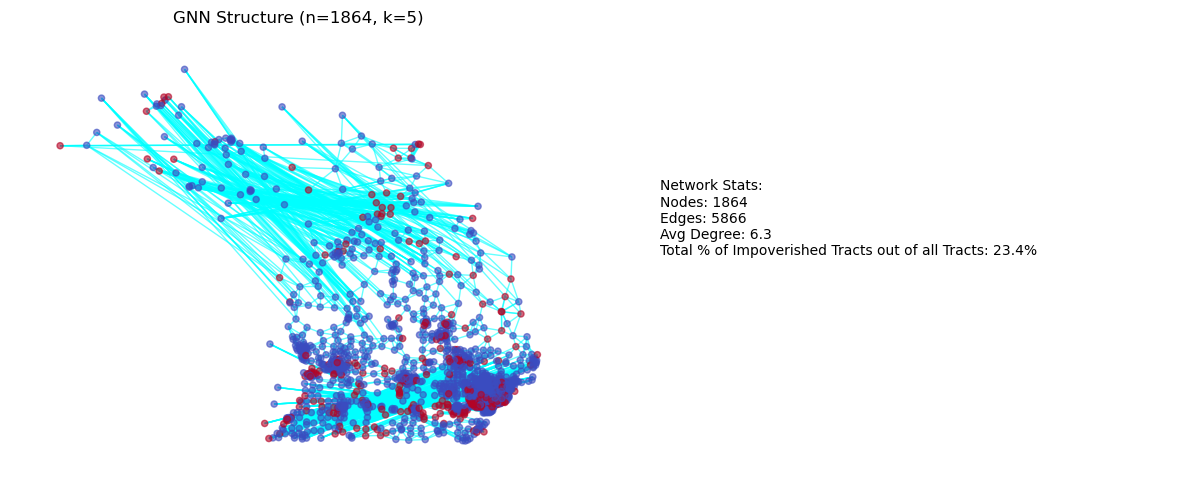

In [25]:
#### Chunk 3: Metrics

from torch_geometric.utils import subgraph, to_networkx
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def plot_gnn_sample(data, coords, sample_size=100):
    """
    Efficient GNN visualization using torch_geometric utilities
    """
    # Sample graph using torch_geometric utilities
    sampled_nodes = np.random.choice(data.x.size(0), size=sample_size, replace=False)
    edge_index, _ = subgraph(torch.tensor(sampled_nodes), data.edge_index, relabel_nodes=True)
    
    sampled_data = Data(x=data.x[sampled_nodes], y=data.y[sampled_nodes], edge_index=edge_index)
    
    # Use to_networkx directly after importing it
    G = to_networkx(sampled_data, to_undirected=True)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Create node positions and color mapping
    pos = {i: (coords[sampled_nodes][i, 1], coords[sampled_nodes][i, 0]) for i in range(len(sampled_nodes))}
    colors = sampled_data.y.numpy().flatten()
    
    nx.draw(
        G, pos=pos, 
        node_color=colors,
        node_size=20,
        edge_color='cyan',
        alpha=0.6,
        ax=ax1,
        cmap=plt.cm.coolwarm
    )
    
    ax1.set_title(f"GNN Structure (n={sample_size}, k={k_neighbors})")
    
    stats = (
        f"Network Stats:\n"
        f"Nodes: {len(G)}\n"
        f"Edges: {G.number_of_edges()}\n"
        f"Avg Degree: {2*G.number_of_edges()/len(G):.1f}\n"
        f"Total % of Impoverished Tracts out of all Tracts: {colors.mean():.1%}"
    )
    
    ax2.text(0.1, 0.5, stats, fontsize=10)
    ax2.axis('off')
    plt.tight_layout()
    return fig

# Visualization with sample
sample_size = 1864
fig = plot_gnn_sample(train_data, coords_train, sample_size)
plt.show()



Training Set Edge Cases:


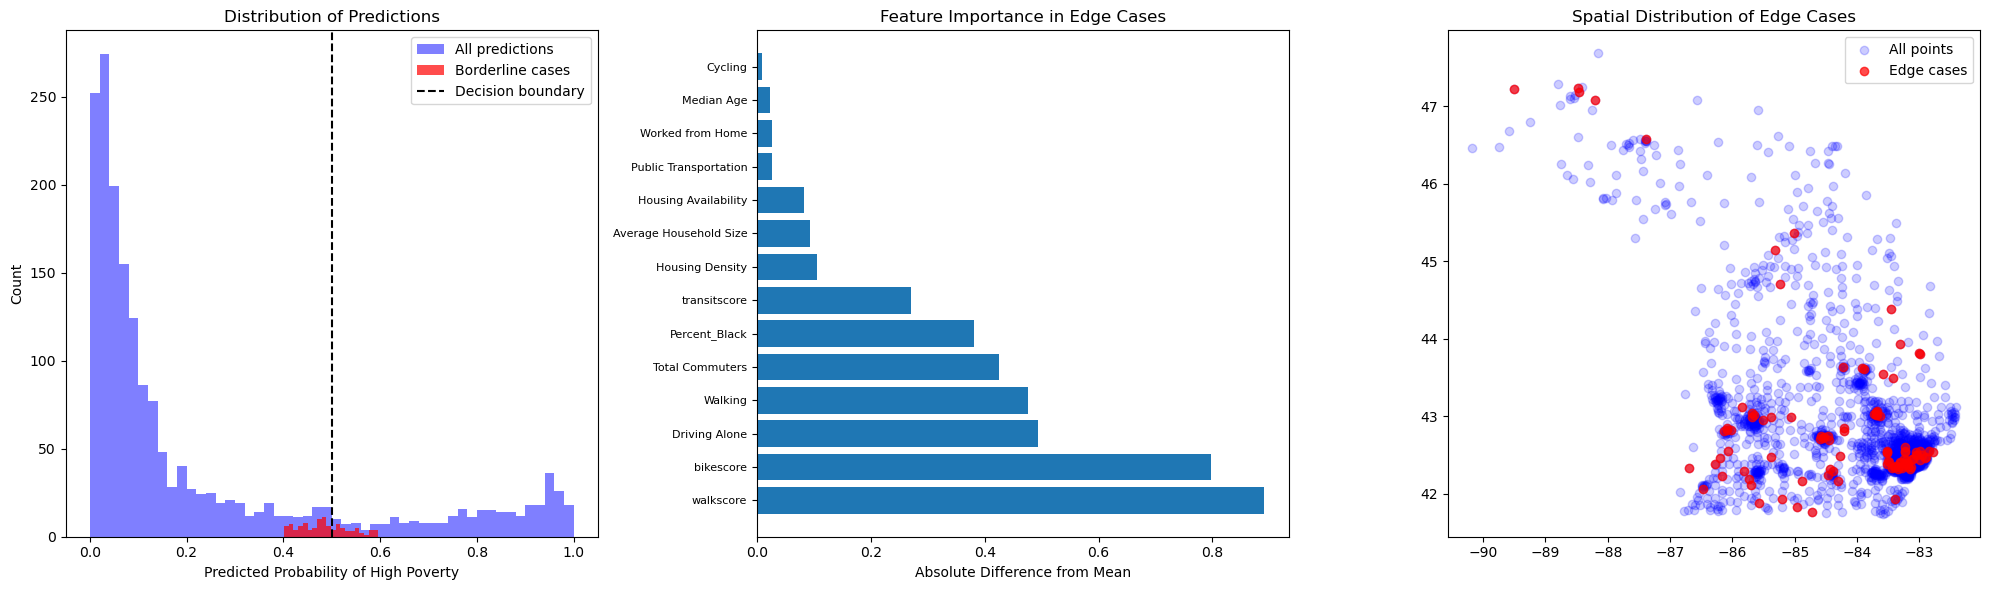


Edge Case Analysis:
Total samples: 1,864
Borderline cases (0.4 < prob < 0.6): 105 (5.6%)
Misclassifications: 233 (12.5%)


In [26]:
### Chunk 4: Edge Cases

def analyze_edge_cases(model, data, feature_names, coords=None, threshold=0.5, margin=0.1):
    """
    Analyzes edge cases in GNN predictions
    """
    model.eval()
    with torch.no_grad():
        # Get predictions
        out = model(data.x, data.edge_index)
        probs = out.numpy().flatten()
        pred = (out > threshold).float()
        actual = data.y.numpy().flatten()
        
        # Identify cases
        borderline_mask = (probs > (threshold - margin)) & (probs < (threshold + margin))
        borderline_cases = np.where(borderline_mask)[0]
        mistake_cases = np.where(pred.numpy().flatten() != actual)[0]
        
        # Create enhanced visualization
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
        
        # Plot 1: Probability Distribution
        ax1.hist(probs, bins=50, alpha=0.5, label='All predictions', color='blue')
        ax1.hist(probs[borderline_cases], bins=20, alpha=0.7, label='Borderline cases', color='red')
        ax1.axvline(x=threshold, color='black', linestyle='--', label='Decision boundary')
        ax1.set_xlabel('Predicted Probability of High Poverty')
        ax1.set_ylabel('Count')
        ax1.set_title('Distribution of Predictions')
        ax1.legend()
        
        # Plot 2: Feature Importance
        edge_case_features = data.x[borderline_cases].mean(axis=0).numpy()
        normal_case_features = data.x.mean(axis=0).numpy()
        feature_diff = np.abs(edge_case_features - normal_case_features)
        
        # Filter zero-difference features
        sorted_idx = np.argsort(feature_diff)[::-1]
        valid_idx = feature_diff[sorted_idx] > 0
        ax2.barh(range(sum(valid_idx)), feature_diff[sorted_idx][valid_idx])
        ax2.set_yticks(range(sum(valid_idx)))
        ax2.set_yticklabels([feature_names[i] for i in sorted_idx if feature_diff[i] > 0], fontsize=8)
        ax2.set_xlabel('Absolute Difference from Mean')
        ax2.set_title('Feature Importance in Edge Cases')
        
        # Plot 3: Spatial Distribution
        if coords is not None:
            edge_nodes = coords[borderline_cases]
            ax3.scatter(coords[:, 1], coords[:, 0], c='blue', alpha=0.2, label='All points')
            ax3.scatter(edge_nodes[:, 1], edge_nodes[:, 0], c='red', alpha=0.7, label='Edge cases')
            ax3.set_title('Spatial Distribution of Edge Cases')
            ax3.legend()
        
        plt.tight_layout()
        plt.show()
        
        # Print enhanced statistics
        print("\nEdge Case Analysis:")
        print(f"Total samples: {len(actual):,}")
        print(f"Borderline cases ({threshold-margin:.1f} < prob < {threshold+margin:.1f}): "
              f"{len(borderline_cases):,} ({len(borderline_cases)/len(actual):.1%})")
        print(f"Misclassifications: {len(mistake_cases):,} ({len(mistake_cases)/len(actual):.1%})")
        
        # Return analysis results for further use if needed
        return {
            'borderline_cases': borderline_cases,
            'mistake_cases': mistake_cases,
            'probabilities': probs
        }

# Analyze edge cases for each dataset
feature_names = list(X_train.columns)
coords_train_np = np.array(coords_train)
print("\nTraining Set Edge Cases:")
train_analysis = analyze_edge_cases(model, train_data, feature_names, coords=coords_train_np)


In [28]:
### Chunk 5: Eval Metrics

from sklearn.metrics import confusion_matrix, classification_report

# Ensure model is in evaluation mode
model.eval()

with torch.no_grad():
    out = model(test_data.x, test_data.edge_index)
    # Convert probabilities to binary predictions
    predictions = (out > 0.5).float()

# Convert tensors to NumPy arrays for scikit-learn functions
y_true = test_data.y.numpy().flatten()
y_pred = predictions.numpy().flatten()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print confusion matrix
print("GNN Confusion Matrix:")
print(cm)

# Compute classification report
report = classification_report(y_true, y_pred, target_names=["Not Impoverished (0)", "Impoverished (1)"])

# Print classification report
print("\nGNN Classification Report:")
print(report)


GNN Confusion Matrix:
[[422  22]
 [ 64  75]]

GNN Classification Report:
                      precision    recall  f1-score   support

Not Impoverished (0)       0.87      0.95      0.91       444
    Impoverished (1)       0.77      0.54      0.64       139

            accuracy                           0.85       583
           macro avg       0.82      0.75      0.77       583
        weighted avg       0.85      0.85      0.84       583



_____
# End of  GNN 2
_____

The following is redundant/old, and is kept to compare prior work and assumptions to current.


Training Set Edge Cases:


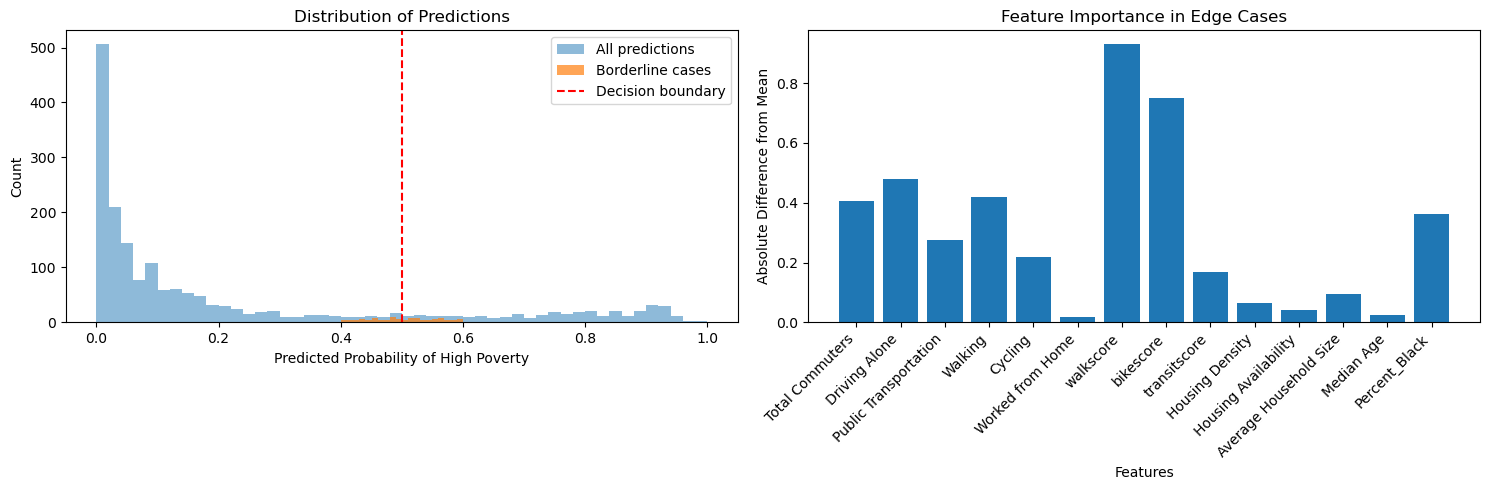

Total samples: 1864
Borderline cases (0.4 < prob < 0.6): 115 (6.2%)
Misclassifications: 240 (12.9%)

Validation Set Edge Cases:


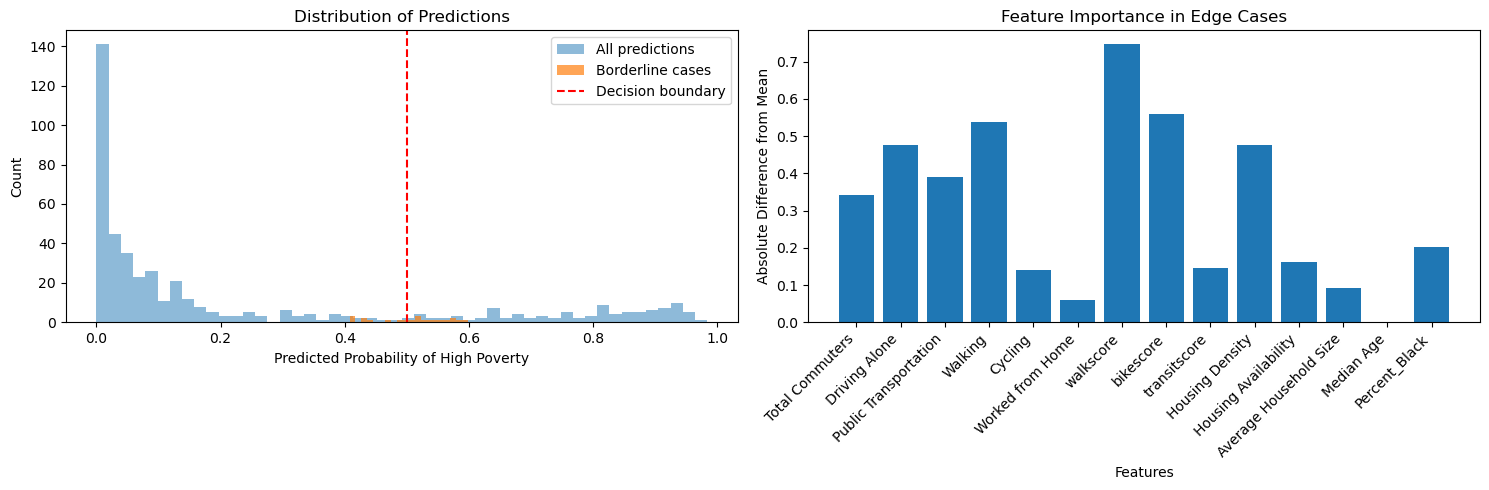

Total samples: 466
Borderline cases (0.4 < prob < 0.6): 22 (4.7%)
Misclassifications: 61 (13.1%)

Test Set Edge Cases:


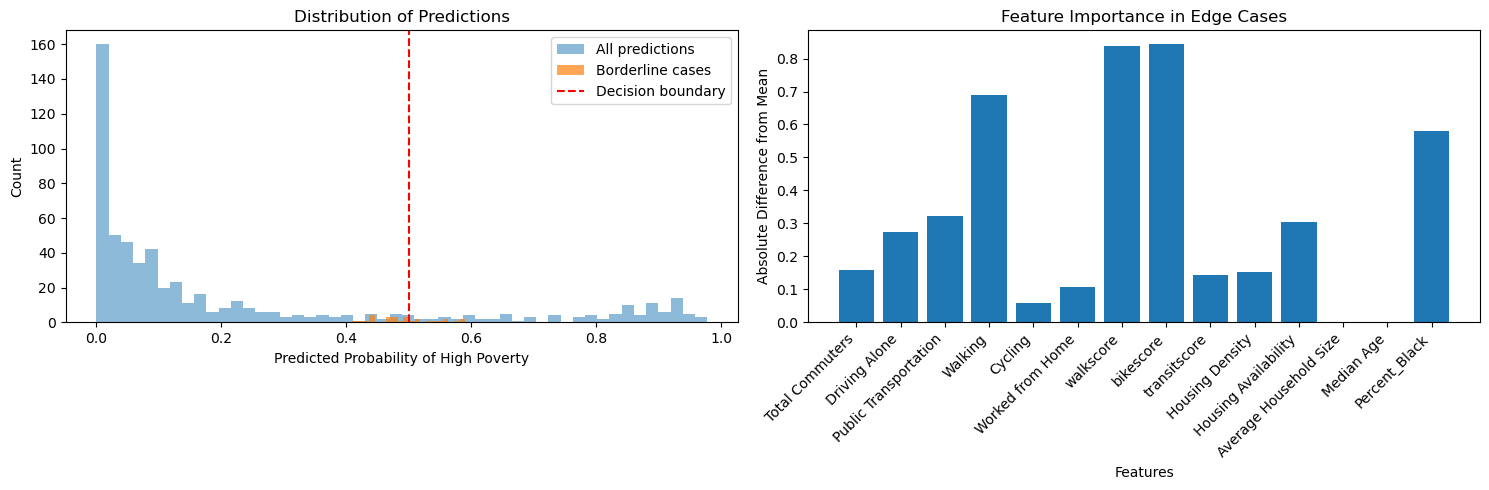

Total samples: 583
Borderline cases (0.4 < prob < 0.6): 28 (4.8%)
Misclassifications: 91 (15.6%)


In [133]:
##### Old Edge Case Results for Comparsion


##### DO NOT USE





def analyze_edge_cases(model, data, feature_names):
    model.eval()
    with torch.no_grad():
        # Get model predictions and probabilities
        out = model(data.x, data.edge_index)
        probs = out.numpy().flatten()
        pred = (out > 0.5).float()
        actual = data.y.numpy().flatten()
        
        # Find edge cases
        borderline_cases = np.where((probs > 0.4) & (probs < 0.6))[0]  # Near decision boundary
        mistake_cases = np.where(pred.numpy().flatten() != actual)[0]   # Misclassifications
        
        # Create visualization
        plt.figure(figsize=(15, 5))
        
        # Plot 1: Distribution of prediction probabilities
        plt.subplot(1, 2, 1)
        plt.hist(probs, bins=50, alpha=0.5, label='All predictions')
        plt.hist(probs[borderline_cases], bins=20, alpha=0.7, label='Borderline cases')
        plt.axvline(x=0.5, color='r', linestyle='--', label='Decision boundary')
        plt.xlabel('Predicted Probability of High Poverty')
        plt.ylabel('Count')
        plt.title('Distribution of Predictions')
        plt.legend()
        
        # Plot 2: Feature importance for edge cases
        plt.subplot(1, 2, 2)
        edge_case_features = data.x[borderline_cases].mean(axis=0)
        normal_case_features = data.x.mean(axis=0)
        
        plt.bar(range(len(feature_names)), np.abs(edge_case_features - normal_case_features))
        plt.xticks(range(len(feature_names)), feature_names, rotation=45, ha='right')
        plt.xlabel('Features')
        plt.ylabel('Absolute Difference from Mean')
        plt.title('Feature Importance in Edge Cases')
        
        plt.tight_layout()
        plt.show()
        
        # Print statistics
        print(f"Total samples: {len(actual)}")
        print(f"Borderline cases (0.4 < prob < 0.6): {len(borderline_cases)} ({len(borderline_cases)/len(actual):.1%})")
        print(f"Misclassifications: {len(mistake_cases)} ({len(mistake_cases)/len(actual):.1%})")

# Get feature names
feature_names = list(X_train.columns)

# Analyze edge cases for each dataset
print("\nTraining Set Edge Cases:")
analyze_edge_cases(model, train_data, feature_names)
print("\nValidation Set Edge Cases:")
analyze_edge_cases(model, val_data, feature_names)
print("\nTest Set Edge Cases:")
analyze_edge_cases(model, test_data, feature_names)







##### DO NOT USE


# End of Model File

In [72]:
len(csv_file.columns)

54